# Day 12 — Group Theory


**Learning Goal**: Understand group axioms, subgroups, and simple permutation groups.

**Seasonal Hook**: Snowflake symmetries and ornament rotations.


### Story Spark
- **Intro**: Ornament rotations rehearse like a dance troupe, each symmetry move returning the design to sparkle-perfect alignment.
- **Gossip**: Stage whispers say the D6 troupe added a secret seventh move only during finale night.
- **Narration Tips**: Present Cayley tables as backstage call sheets; celebrate when compositions loop back to identity like curtain calls.

### Experiment Game Plan
- **Outline**: Use `sagecell` via `sagemathcell` link or Python permutations to show D6 symmetries; include Cayley table generation.
- **Diagram Goal**: Snowflake annotated with symmetry operations plus Cayley table heatmap.

### References & Resources
- [Gallian "Contemporary Abstract Algebra"](https://www.davidgallian.org/contemporary-abstract-algebra/)
- [Visual Group Theory by Nathan Carter](https://www.crcpress.com/Visual-Group-Theory/Carter/p/book/9780883857571)
- [Group Explorer app documentation.](http://nathancarter.github.io/group-explorer/)
- Story cues: Gallian covers fundamentals, Visual Group Theory adds pictures, Group Explorer gives interactive demos.

### Shared Imports

In [1]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-colorblind')

try:
    import ipywidgets as widgets
    from ipywidgets import interact, FloatSlider, IntSlider
except Exception as exc:
    widgets = None
    def interact(*args, **kwargs):
        print('ipywidgets unavailable; adjust parameters manually instead.')
    print('ipywidgets could not be loaded:', exc)

### Guided Experiments & Visuals
The following cell builds the math exploration plus the requested diagram.

Cayley table snapshot (first 12 ops):
r0 -> ['r0', 's0', 'r1', 's1', 'r2', 's2', 'r3', 's3', 'r4', 's4', 'r5', 's5']
s0 -> ['s0', 'r0', 's1', 'r1', 's2', 'r2', 's3', 'r3', 's4', 'r4', 's5', 'r5']
r1 -> ['r1', 's5', 'r2', 's0', 'r3', 's1', 'r4', 's2', 'r5', 's3', 'r0', 's4']
s1 -> ['s1', 'r5', 's2', 'r0', 's3', 'r1', 's4', 'r2', 's5', 'r3', 's0', 'r4']
r2 -> ['r2', 's4', 'r3', 's5', 'r4', 's0', 'r5', 's1', 'r0', 's2', 'r1', 's3']
s2 -> ['s2', 'r4', 's3', 'r5', 's4', 'r0', 's5', 'r1', 's0', 'r2', 's1', 'r3']
r3 -> ['r3', 's3', 'r4', 's4', 'r5', 's5', 'r0', 's0', 'r1', 's1', 'r2', 's2']
s3 -> ['s3', 'r3', 's4', 'r4', 's5', 'r5', 's0', 'r0', 's1', 'r1', 's2', 'r2']
r4 -> ['r4', 's2', 'r5', 's3', 'r0', 's4', 'r1', 's5', 'r2', 's0', 'r3', 's1']
s4 -> ['s4', 'r2', 's5', 'r3', 's0', 'r4', 's1', 'r5', 's2', 'r0', 's3', 'r1']
r5 -> ['r5', 's1', 'r0', 's2', 'r1', 's3', 'r2', 's4', 'r3', 's5', 'r4', 's0']
s5 -> ['s5', 'r1', 's0', 'r2', 's1', 'r3', 's2', 'r4', 's3', 'r5', 's4', 'r0']


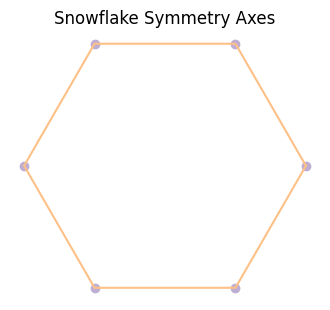

In [2]:

from sympy.combinatorics import Permutation

vertices = list(range(6))

def rotation(k):
    return Permutation([(i + k) % 6 for i in vertices])

def reflection(k):
    return Permutation([(k - i) % 6 for i in vertices])

operations = {}
for k in range(6):
    operations[f'r{k}'] = rotation(k)
    operations[f's{k}'] = reflection(k)

def compose(name_a, name_b):
    return operations[name_a] * operations[name_b]

names = list(operations.keys())[:12]
table = []
for a in names:
    row = []
    for b in names:
        result = compose(a, b)
        for key, perm in operations.items():
            if perm == result:
                row.append(key)
                break
    table.append(row)

print('Cayley table snapshot (first 12 ops):')
for label, row in zip(names, table):
    print(label, '->', row)

angles = np.linspace(0, 2 * np.pi, 7)
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(np.cos(angles), np.sin(angles), color='#fdc086')
ax.scatter(np.cos(angles[:-1]), np.sin(angles[:-1]), color='#beaed4')
ax.set_aspect('equal')
ax.set_title('Snowflake Symmetry Axes')
ax.axis('off')
plt.show()


### Final Hands-on Challenge
Build the multiplication table for a chosen ornament symmetry group and identify subgroups. "Let learners generate a Cayley table, annotate their favorite subgroup, and describe how the ornament keeps its poise."

In [3]:

# 📌 Final Hands-on Task
# Build the multiplication table for a chosen ornament symmetry group and identify subgroups. "Let learners generate a Cayley table, annotate their favorite subgroup, and describe how the ornament keeps its poise."

# Use the cells above as inspiration, then document your reasoning below.
# Feel free to add markdown, code, or even upload supporting images.
